# Week 7 Overview

Again this week will be a mix of data processing and linear algebra. 
The first 5 problems are data cleaning and the final two problems are linear algebra. 

## Data Cleaning

Techniques for cleaning & preparing data

### Learning Outcomes
- how to find & fix missing values
- how to simplify your data
- how to fix data-type problems
- how to work with indexes


Data cleaning and transformation is one of the situations where importing from a python file is helpful. For example in this [project](https://github.com/hlandrus/olympic_climbing_prediction) I created a [notebook](https://github.com/hlandrus/olympic_climbing_prediction/blob/main/explore-ifsc-data.ipynb) that had most of my model building and testing while the file [data_processing.py](https://github.com/hlandrus/olympic_climbing_prediction/blob/main/data_processing.py) contained the data processing required clean and transform the data. I did this because the data processing doesn't add understanding to the project. Instead I focused on keeping the interesting things in the notebook and the less interesting things in a python file. You could do this with many things like putting a model training and testing pipeline into a file and only running and displaying the results in your notebook. Overall think about putting what you want to communicate and share in the notebook and what is not helpful for communicating your findings into a file.


## Important
We will start using this paradigm in this notebook. I have already written all the code in this notebook that will call functions you will create in `data_processing.py`. Once you have completed that you should be able to run this notebook and get the desired results. 

I would encourage you to play around with processing the data in this notebook and then once you have the code figured over move it to `data_processing.py`


### Data Cleaning

Cleaning data is a crucial and often time-consuming step in data science.

Data scientists might use pure Python, pandas, or other programming tools for this step. Examples here focus on pandas with a few other approaches for specific scenarios.

Common tasks are:

*   Handling missing data
*   Cleaning up column names
*   Simplifying data
*   Data-type conversion

We will be using the csv `messy_IMDB_dataset.csv` imported below. Notice the seperator and encoding values are specified here and not the default. This is because this is a fairly non-standard csv using `;` as seperators and an encoding of `latin-1`. Take a look at the raw csv to see how this data looks different from other csvs you have seen. 

In [61]:
import pandas as pd 
import importlib
import data_processing

df_raw = pd.read_csv('messy_IMDB_dataset.csv', sep=";" , encoding='latin-1')
# Starting stats of data
df_raw.describe(include="all")

,IMBD title ID,Original titlÊ,Release year,Genrë¨,Duration,Country,Content Rating,Director,Unnamed: 8,Income,Votes,Score
count,100,100,100,100,99,100,77,100,0.0,100,100,100
unique,100,100,99,59,71,18,7,64,NaN,100,100,28
top,tt0111161,The Shawshank Redemption,2000-05-19,Drama,119,USA,R,Christopher Nolan,NaN,$ 28815245,2.278.845,8.6
freq,1,1,2,9,3,62,45,6,NaN,1,1,11
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Preping Columns

When you get data from unknown sources they often have columne names that are difficult to work with. For example it is harder to work with with a column named `IMBD title ID` than `imbd_title_id` because you would have to remember which letters where upper case and double clicking the column name doesn't automatically highlight the full colum name in case you wanted to copy and paste it. This data also has non-standard characters in the column name. 

### Problem 1 (5 pts):

For this first problem you will update the column names as follows:
* All lower case
* Remove trailing and leading spaces
* Turn spaces between words to underscores
* Specific Changes: 
    * Original titlÊ -> original_title
    * Genrë¨ -> genre
    * Unnamed:_8 -> unnamed_8

To do this create a function in `data_processing.py` called `rename_columns`. This function should take in `df_raw` and return a new dataframe with the renamed columns. Save that new dataframe to a variable in your notebook called `df_columns_renamed`. If you want to pass other information into `rename_columns` feel free.

This patterned is displayed below.

In [62]:
from data_processing import rename_columns
df_columns_renamed = rename_columns(df_raw)
df_columns_renamed.head()

,imbd_title_id,original_title,release_year,genre,duration,country,content_rating,director,unnamed_8,income,votes,score
0,tt0111161,The Shawshank Redemption,1995-02-10,Drama,142,USA,R,Frank Darabont,NaN,$ 28815245,2.278.845,9.3
1,tt0068646,The Godfather,09 21 1972,"Crime, Drama",175,USA,R,Francis Ford Coppola,NaN,$ 246120974,1.572.674,9.2
2,tt0468569,The Dark Knight,23 -07-2008,"Action, Crime, Drama",152,US,PG-13,Christopher Nolan,NaN,$ 1005455211,2.241.615,9.
3,tt0071562,The Godfather: Part II,1975-09-25,"Crime, Drama",220,USA,R,Francis Ford Coppola,NaN,"$ 4o8,035,783",1.098.714,"9,.0"
4,tt0110912,Pulp Fiction,1994-10-28,"Crime, Drama",,USA,R,Quentin Tarantino,NaN,$ 222831817,1.780.147,"8,9f"


#### Handling Missing Data

Often data analysts need to account for missing data values.

pandas uses the floating-point value `NaN` (Not a Number) to represent missing numerica data. This is a `sentinel` value that can be easily detected.

The built-in Python `None` value is also treated as NaN.

pandas has several methods for detecting NaN values in a Series or DataFrame:
- isnull
- notnull

These methods can be used as filters in a data query.

`data[data.notnull()]`

Alternatively, programs can use `dropna` to filter axis labels where values may have missing data.

`dropna` has options to control how many missing values a row or column should have to be dropped.

**replace missing values**
Sometimes it's more useful to replace missing data with a specific or interpreted value, using `fillna`.

```
df_2 = df.fillna(-1) # return new dataframe with -1 in place of missing values
df.fillna(-1, inplace=True) # fill missing values with -1 in original dataframe
```


### Problem 2 (10 pts):

The first thing we are going to do is remove completely null rows and columns. To do this create a function in `data_processing.py` called `remove_fully_null_columns_rows`. This function should take in `df_columns_renamed` and return a new dataframe with the renamed columns. Save that new dataframe to a variable in your notebook called `df_fully_null_removed`.

Once this is done `df_fully_null_removed` should have shape `(100, 11)`.

In [63]:
importlib.reload(data_processing)
from data_processing import remove_fully_null_columns_rows

df_fully_null_removed = remove_fully_null_columns_rows(df_columns_renamed)
df_fully_null_removed.shape

(100, 11)

### Problem 3 (10 pts):
Looking at describe again we can see that most of our columns *appear* not null except `duration` and `content_rating`. We are going to ignore `duration` for now and focus on `content_rating`. 

In the file `data_processing` you are going to create a function named `clean_and_fill_content_rating`. This function will do the following:
* Take in `df_fully_null_removed`
* Output a new dataframe with: 
    * NaN in `content_rating` filled with `Unrated` 
    * `Not Rated` replaced to `Unrated`

Save the output to a new dataframe named `df_clean_content_rating`

Your final value counts for `content_rating` should be:

```
content_rating
R           45
Unrated     25
PG-13       12
PG          11
G            6
Approved     1
```

In [64]:
importlib.reload(data_processing)
from data_processing import clean_and_fill_content_rating

df_clean_content_rating = clean_and_fill_content_rating(df_fully_null_removed)
df_clean_content_rating['content_rating'].value_counts()

content_rating
R           45
Unrated     25
PG-13       12
PG          11
G            6
Approved     1
Name: count, dtype: int64

Now before we deal with the rest of the null values we are going to do some type conversion because that will lead to move nulls. If you run the cell below you should see that all columns are currently objects but several of them should be converted. 
* release_year -> date
* duration -> int
* income -> int
* vote -> float
* score -> float

The unfortunate thing is that if we just try to do any of the straightforward type conversions with pandas these will fail because they have bad data in them. So we will need to fix each column before we convert it. 

We will only clean `release_year` and `income` in this notebook but if you want more practice feel free to work through the other columns as well. 

In [74]:
df_clean_content_rating.head()

,imbd_title_id,original_title,release_year,genre,duration,country,content_rating,director,income,votes,score
0,tt0111161,The Shawshank Redemption,1995-02-10,Drama,142,USA,R,Frank Darabont,$ 28815245,2.278.845,9.3
1,tt0068646,The Godfather,09 21 1972,"Crime, Drama",175,USA,R,Francis Ford Coppola,$ 246120974,1.572.674,9.2
2,tt0468569,The Dark Knight,23 -07-2008,"Action, Crime, Drama",152,US,PG-13,Christopher Nolan,$ 1005455211,2.241.615,9.
3,tt0071562,The Godfather: Part II,1975-09-25,"Crime, Drama",220,USA,R,Francis Ford Coppola,"$ 4o8,035,783",1.098.714,"9,.0"
4,tt0110912,Pulp Fiction,1994-10-28,"Crime, Drama",,USA,R,Quentin Tarantino,$ 222831817,1.780.147,"8,9f"


### Problem 4 (10 pts):
For `release_year` you are going to create a function `clean_release_year` in your file. This function will take in `df_clean_content_rating` and output a new dataframe with two new columns: 
* `release_year_coerce`: Use to use pd.to_datetime with errors='coerce'
* `release_year_mixed`: Use to use `pd.to_datetime` with `errors='coerce'` and `format="mixed"`

Save the output to `df_clean_release_year_temp`. Then run the next cell to see the results. Manually inspect to see if all the movies have correct release dates. Ideally we would go through and update all the incorrect or missing data but for now we will just remove it. Create a new dataframe `df_clean_release_year` that removed the 4 movies below from `df_clean_release_year_temp`. 

```
['Casablanca', 'Sunset Blvd.', 'Scarface', 'Taxi Driver']
```

In [90]:
importlib.reload(data_processing)
from data_processing import clean_release_year


df_clean_release_year_temp = clean_release_year(df_clean_content_rating)

c:\Users\flori\Documents\GitHub\AD450_FE\data_processing.py:43: SyntaxWarning: invalid escape sequence '\$'


In [91]:
df_clean_release_year_temp[df_clean_release_year_temp["release_year_coerce"].isna()
                           ][['release_year', 'release_year_coerce',
                             'release_year_mixed','original_title']]


,release_year,release_year_coerce,release_year_mixed,original_title
1,09 21 1972,NaT,1972-09-21,The Godfather
2,23 -07-2008,NaT,2008-07-23,The Dark Knight
5,22 Feb 04,NaT,2004-02-22,The Lord of the Rings: The Return of the King
9,10-29-99,NaT,1999-10-29,Fight Club
12,23rd December of 1966,NaT,1966-12-23,"Il buono, il brutto, il cattivo"
15,01/16-03,NaT,2003-01-16,The Lord of the Rings: The Two Towers
18,18/11/1976,NaT,1976-11-18,One Flew Over the Cuckoo's Nest
45,21-11-46,NaT,2046-11-21,Casablanca
70,"The 6th of marzo, year 1951",NaT,NaT,Sunset Blvd.
83,1984-02-34,NaT,NaT,Scarface


In [92]:
# Remove movies here ['Casablanca', 'Sunset Blvd.', 'Scarface', 'Taxi Driver']
df_clean_release_year = df_clean_release_year_temp[~df_clean_release_year_temp['original_title'].isin(['Casablanca', 'Sunset Blvd.', 'Scarface', 'Taxi Driver'])].copy()
df_clean_release_year.head()


,imbd_title_id,original_title,release_year,genre,duration,country,content_rating,director,income,votes,score,release_year_coerce,release_year_mixed
0,tt0111161,The Shawshank Redemption,1995-02-10,Drama,142,USA,R,Frank Darabont,$ 28815245,2.278.845,9.3,1995-02-10,1995-02-10
1,tt0068646,The Godfather,09 21 1972,"Crime, Drama",175,USA,R,Francis Ford Coppola,$ 246120974,1.572.674,9.2,NaT,1972-09-21
2,tt0468569,The Dark Knight,23 -07-2008,"Action, Crime, Drama",152,US,PG-13,Christopher Nolan,$ 1005455211,2.241.615,9.,NaT,2008-07-23
3,tt0071562,The Godfather: Part II,1975-09-25,"Crime, Drama",220,USA,R,Francis Ford Coppola,"$ 4o8,035,783",1.098.714,"9,.0",1975-09-25,1975-09-25
4,tt0110912,Pulp Fiction,1994-10-28,"Crime, Drama",,USA,R,Quentin Tarantino,$ 222831817,1.780.147,"8,9f",1994-10-28,1994-10-28


## Problem 5 (10 pts):

The column `income` should be an int but it has `$`, commas, and a few other issues. Create the function   `clean_income` in your file such that it outputs a dataframe with the column `income` correctly cleaned and converted to an int. 

In [96]:
importlib.reload(data_processing)
from data_processing import clean_income

df_clean_income = clean_income(df_clean_release_year)

In [95]:
df_clean_income.head()

,imbd_title_id,original_title,release_year,genre,duration,country,content_rating,director,income,votes,score,release_year_coerce,release_year_mixed
0,tt0111161,The Shawshank Redemption,1995-02-10,Drama,142,USA,R,Frank Darabont,28815245,2.278.845,9.3,1995-02-10,1995-02-10
1,tt0068646,The Godfather,09 21 1972,"Crime, Drama",175,USA,R,Francis Ford Coppola,246120974,1.572.674,9.2,NaT,1972-09-21
2,tt0468569,The Dark Knight,23 -07-2008,"Action, Crime, Drama",152,US,PG-13,Christopher Nolan,1005455211,2.241.615,9.,NaT,2008-07-23
3,tt0071562,The Godfather: Part II,1975-09-25,"Crime, Drama",220,USA,R,Francis Ford Coppola,0,1.098.714,"9,.0",1975-09-25,1975-09-25
4,tt0110912,Pulp Fiction,1994-10-28,"Crime, Drama",,USA,R,Quentin Tarantino,222831817,1.780.147,"8,9f",1994-10-28,1994-10-28


## Matrix Time

Here are some problems related to what we learned this week about linear algebra.

### Problem 6 (20 pts):

<img src="images/matrix_transformations_1.png" width="200"/>
<img src="images/matrix_transformations_3.png" width="200"/>
<img src="images/matrix_transformations_2.png" width="200"/>
<img src="images/matrix_transformations_4.png" width="200"/>


1. Create all of the matrices in the images above. If there is a k select a integer to input in.  
2. Create two random 2d vectors with integer values less than 10. 
3. Apply each of the matrices to the vectors. 
4. Graph the original vectors and the transformed vectors by modifying the quiver code below. If you want to get more creative feel free.  
5. For each graph set the title to be a description of the transformation 

C:\Users\flori\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\matplotlib\quiver.py:602: RuntimeWarning: invalid value encountered in divide
  lengths = np.hypot(*dxy.T) / eps


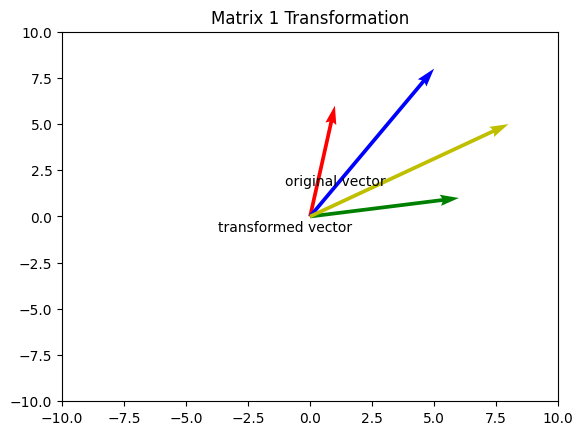

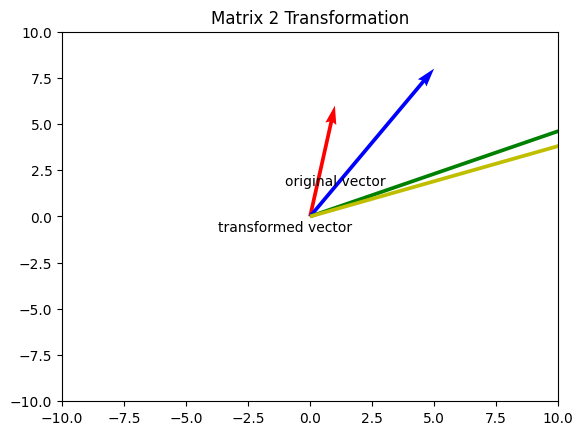

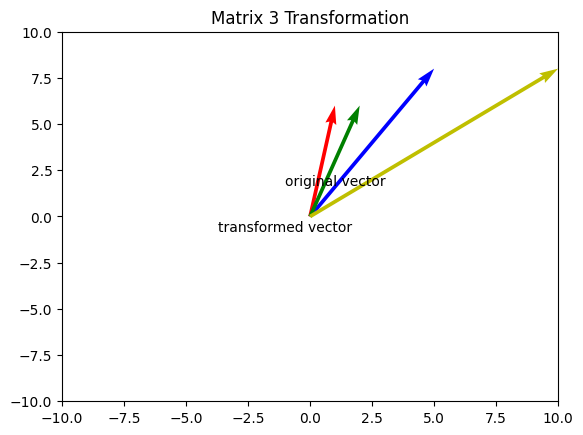

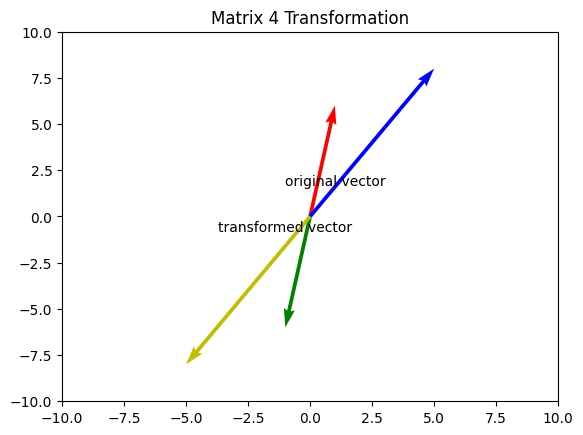

In [100]:
import numpy as np
import matplotlib.pyplot as plt

k = 2

matrix1 = np.array([[0, 1], [1, 0], [1,0], [0,-1], [-1,0], [0,1]])
matrix2 = np.array([[1, k], [0, 1], [1,0], [k,1]])
matrix3 = np.array([[k, 0], [0, 1], [1,0],[0,k]])
matrix4 = np.array([[-1, 0], [0, -1], [0, 1], [-1, 0], [0, -1], [1, 0]])

vector1 = np.array([np.random.randint(1, 10), np.random.randint(1, 10)])
vector2 = np.array([np.random.randint(1, 10), np.random.randint(1, 10)])

transformed_vector1_1 = matrix1.dot(vector1)
transformed_vector1_2 = matrix1.dot(vector2)

transformed_vector2_1 = matrix2.dot(vector1)
transformed_vector2_2 = matrix2.dot(vector2)

transformed_vector3_1 = matrix3.dot(vector1)
transformed_vector3_2 = matrix3.dot(vector2)

transformed_vector4_1 = matrix4.dot(vector1)
transformed_vector4_2 = matrix4.dot(vector2)

def plot_vectors(original_vec1, transformed_vec1, original_vec2, transformed_vec2, transformation_title):
    quiver = plt.quiver([0, 0], 
                        [0, 0], 
                        [original_vec1[0], original_vec2[0]], 
                        [original_vec1[1], original_vec2[1]],
                        angles='xy', 
                        scale_units='xy', 
                        scale=1,
                        color=['r', 'b'])
    
    plt.quiver([0, 0], 
               [0, 0], 
               [transformed_vec1[0], transformed_vec2[0]], 
               [transformed_vec1[1], transformed_vec2[1]],
               angles='xy', 
               scale_units='xy', 
               scale=1,
               color=['g', 'y'])
    
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.quiverkey(quiver, 1, 1, 1, 'original vector', coordinates='data')
    plt.quiverkey(quiver, -1, -1.5, 1, 'transformed vector', coordinates='data')
    plt.title(transformation_title)
    plt.show()

plot_vectors(vector1, transformed_vector1_1, vector2, transformed_vector1_2, 'Matrix 1 Transformation')
plot_vectors(vector1, transformed_vector2_1, vector2, transformed_vector2_2, 'Matrix 2 Transformation')
plot_vectors(vector1, transformed_vector3_1, vector2, transformed_vector3_2, 'Matrix 3 Transformation')
plot_vectors(vector1, transformed_vector4_1, vector2, transformed_vector4_2, 'Matrix 4 Transformation')


### Problem 7 (20 pts):
Confirm the LIVE EVIL rule using the following five steps: 

1. Create four matrices of random numbers, setting the sizes to be $L \in \mathbb{R}^{2 \times 6}$, $I \in \mathbb{R}^{6 \times 3}$, $V \in \mathbb{R}^{3 \times 5}$, $E \in \mathbb{R}^{5 \times 2}$

2. Multiply the four matrices and transpose the product. 

3. Transpose each matrix individually and multiply them without reversing their order. 

4. Transpose each matrix individually and multiply them reversing their order according to the LIVE EVIL rule. Check whether the result of step 2 matches the results of step 3 and step 4. 

5. Repeat the previous steps but using all square matrices.

In [ ]:
import numpy as np

L = np.random.rand(2, 6)
I = np.random.rand(6, 3)
V = np.random.rand(3, 5)
E = np.random.rand(5, 2)

product_original = L @ I @ V @ E
product_transposed = product_original.T

product_live_evil = E.T @ V.T @ I.T @ L.T

results_match = np.allclose(product_transposed, product_live_evil)

L_square = np.random.rand(3, 3)
I_square = np.random.rand(3, 3)
V_square = np.random.rand(3, 3)
E_square = np.random.rand(3, 3)

product_square_original = L_square @ I_square @ V_square @ E_square
product_square_transposed = product_square_original.T

product_square_live_evil = E_square.T @ V_square.T @ I_square.T @ L_square.T

results_match_square = np.allclose(product_square_transposed, product_square_live_evil)

results_match, results_match_square


(True, True)